In [4]:
import pandas as pd
import numpy as np
from pysyncon import Dataprep, AugSynth

In [5]:
# import the data

df_mo = pd.read_csv('../../../SharedData/total_state_data.csv')
df_yr = pd.read_csv('../../../SharedData/yearly_total_data.csv')

In [6]:
states = [
    "AL", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

In [7]:
# add a bunch of features (these will eventually get moved to combine_files.ipynb)

df_mo['co2_per_capita'] = df_mo['monthly_emissions'] / df_mo['monthly_population']
df_mo['gdp_per_capita'] = df_mo['gdp_rel_2017_interp'] / df_mo['monthly_population']
df_mo['eprod_per_capita'] = df_mo['monthly_energy_prod'] / df_mo['monthly_population']
df_mo['eflow_per_capita'] = df_mo['monthly_energy_flow'] / df_mo['monthly_population']
df_mo['euse_per_capita'] = df_mo['monthly_energy_use'] / df_mo['monthly_population']
df_mo['avg_facility_age'] = df_mo['total_facility_age']/df_mo['monthly_num_plants']


sma_feature_list = ['monthly_pop_density', 'yearly_pop_density',
       'monthly_emissions', 'prcp', 'snow', 'tavg',
       'gdp_rel_2017', 'gdp_rel_2017_interp', 'yearly_gdp_rel_2017',
       'monthly_energy_prod', 'yearly_energy_prod', 'monthly_energy_use',
       'yearly_energy_use', 'monthly_energy_flow', 'yearly_energy_flow',
       'monthly_num_plants', 'yearly_num_plants', 'total_facility_age',
       'monthly_energy_total', 'yearly_energy_total', 'monthly_energy_renew',
       'yearly_energy_renew', 'monthly_renew_pct', 'yearly_renew_pct',
       'monthly_energy_fossil', 'yearly_energy_fossil', 'monthly_fossil_pct',
       'yearly_fossil_pct', 'co2_per_capita',
       'gdp_per_capita', 'eprod_per_capita', 'eflow_per_capita',
       'euse_per_capita', 'avg_facility_age']

# create column for simple moving avg of co2_per_capita; ma_window is the moving average window size (n=1 corresponds to usual monthly results)

df_mo['co2_per_capita_sma']= np.nan
ma_window = 12

for feature in sma_feature_list:
    for state in states:
        df_mo.loc[df_mo.state==state,feature+str('_sma')] = df_mo.loc[df_mo.state==state,feature].rolling(window=ma_window).mean()


df_yr['co2_per_capita'] = df_yr['yearly_emissions'] / df_yr['yearly_population']
df_yr['gdp_per_capita'] = df_yr['yearly_gdp_rel_2017'] / df_yr['yearly_population']
df_yr['eprod_per_capita'] = df_yr['yearly_energy_prod'] / df_yr['yearly_population']
df_yr['eflow_per_capita'] = df_yr['yearly_energy_flow'] / df_yr['yearly_population']
df_yr['euse_per_capita'] = df_yr['yearly_energy_use'] / df_yr['yearly_population']

In [8]:
treatment_date = '2009-01-01'
preintervention_ma_start_date = str((pd.to_datetime('1990-06-01')+ pd.DateOffset(months=ma_window-1)).strftime('%Y-%m-%d'))

# these are the time values where CO2 per capita is fit
preintervention_time_range = df_mo.date[(df_mo.date >= '1990-06-01')&(df_mo.date<treatment_date)]

# these are the time values where our features are fit (subset of preintervention_time_range)
preintervention_feature_range = df_mo.date[(df_mo.date >= '1990-01-01') & (df_mo.date<treatment_date)]
preintervention_weather_range = df_mo.date[(df_mo.date >= '1990-01-01') & (df_mo.date<treatment_date)]
preintervention_gdp_range = df_mo.date[(df_mo.date >= '1997-12-01') & (df_mo.date<treatment_date)]
preintervention_per_capita_range = df_mo.date[(df_mo.date >= '1990-06-01') & (df_mo.date<treatment_date)]
preintervention_energy_range = df_mo.date[(df_mo.date >= '1990-12-01') & (df_mo.date<treatment_date)]
preintervention_ma_range = df_mo.date[(df_mo.date >= preintervention_ma_start_date) & (df_mo.date<treatment_date)]

# these are the dates used for our monthly_emissions graph
years = pd.date_range(start='1990-06-01', end='2019-12-01', freq='MS').strftime('%Y-%m-%d').tolist()

# these are the dates used for our monthly_emissions SMA graph
years_sma = pd.date_range(start=preintervention_ma_start_date, end='2019-12-01', freq='MS').strftime('%Y-%m-%d').tolist()


In [9]:
# these lists are used for treatment_time in graphs below

treatment_dates = []
for year in years:
    if year.startswith('2009'):
        treatment_dates.append(year)

treatment_dates_ma = []
for year in years_sma:
    if year.startswith('2009'):
        treatment_dates_ma.append(year)
        
preintervention_ma_range_dt = pd.to_datetime(preintervention_ma_range)

In [10]:
rggi_states = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'RI', 'VT']

other_states = ["CA", "AK", "HI"]
# States not belonging to RGGI or other cap-and-trade programs.
# WA will be included here because its cap-and-trade program was not around until after 2020.
control_states = list(set(states) - set(rggi_states) - set(other_states))

In [11]:
def date_to_str(date):
    return date.dt.strftime('%Y-%m-%d')

WI   -0.254
AZ    0.524
IL   -0.658
IN    0.118
SD    0.267
MT   -0.059
PA    1.907
MN    0.047
MS   -0.162
OR    0.078
VA    0.274
KY   -0.059
WA   -0.468
SC    0.098
NC   -0.889
NE   -0.166
WV    0.221
NM    0.011
TN    0.485
NV    0.127
ID   -0.049
UT   -0.995
CO    1.017
ND    0.058
GA   -0.417
AR   -0.320
LA   -0.182
IA    0.550
MI    0.411
OH    0.159
TX    0.321
MO   -0.562
AL   -0.330
KS   -0.032
WY   -0.026
OK   -0.422
FL    0.379
Name: weights, dtype: float64
0.00038867752401360695


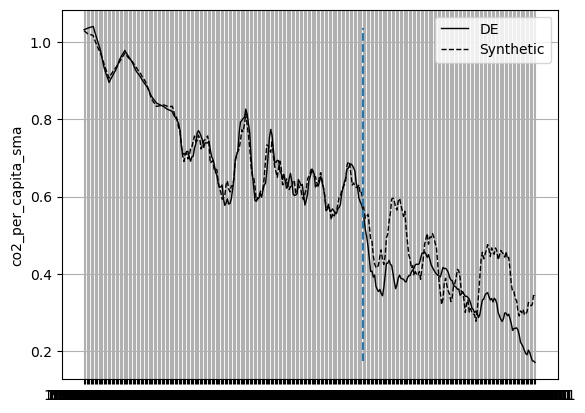

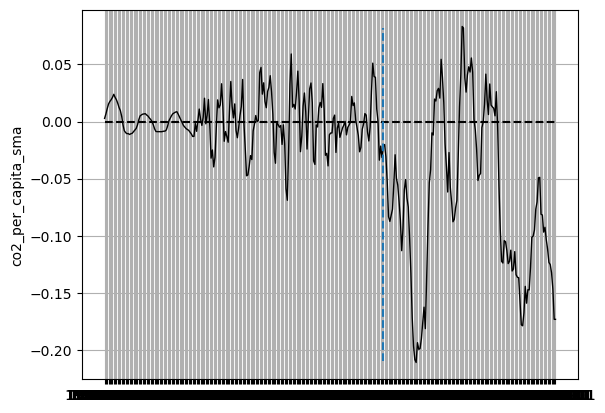

,treated,synthetic,sample mean
co2_per_capita_sma,0.749,0.749,1.279
special.1.avg_facility_age_sma,55.871,55.875,60.473
special.2.snow_sma,0.878,0.877,1.679
special.3.tavg_sma,56.782,56.793,56.063
special.4.monthly_pop_density_sma,0.003,0.003,0.033
special.5.eprod_per_capita_sma,0.000,0.001,0.060
special.6.gdp_per_capita_sma,0.000,0.000,0.000
special.7.monthly_fossil_pct_sma,0.966,0.967,0.709


In [27]:
dataprep_mo_ma = Dataprep(
    foo=df_mo,
    predictors=['co2_per_capita_sma'],
    predictors_op="mean",
    time_predictors_prior=preintervention_ma_range,
    special_predictors=[
        ('avg_facility_age_sma',date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'median'),
        ('snow_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==1)]), 'mean'),
        ('tavg_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==7)]),'mean'),   
        ('monthly_pop_density_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year>=1991) & (preintervention_ma_range_dt.dt.year<=2008)]), "mean"),        
        ('eprod_per_capita_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),        
        ('gdp_per_capita_sma',  date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year>=2007)& (preintervention_ma_range_dt.dt.year<=2008)]), 'std'),
        ('monthly_fossil_pct_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),
        #('republican_vote_pct', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=2004)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==12)]), 'mean'), 
        #('euse_per_capita_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=2007)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),
        ],
    dependent="co2_per_capita_sma",
    unit_variable="state",
    time_variable="date",
    treatment_identifier="DE",
    controls_identifier=control_states,
    time_optimize_ssr=preintervention_ma_range
    )
# monthly_emissions SMA version

synth_mo_ma = AugSynth()
synth_mo_ma.fit(dataprep=dataprep_mo_ma) 
print(synth_mo_ma.weights())#threshold=.1
print(synth_mo_ma.mspe())

synth_mo_ma.path_plot(time_period=years_sma, treatment_time=treatment_dates_ma[0])
synth_mo_ma.gaps_plot(time_period=years_sma, treatment_time=treatment_dates_ma[0])

synth_mo_ma.summary()

State: CT
5.140034539510824e-05
WI    0.153
AZ   -0.023
IL    0.172
IN    0.186
SD   -0.042
MT   -0.007
PA    0.034
MN    0.233
MS    0.037
OR   -0.148
VA    0.160
KY   -0.003
WA    0.063
SC    0.025
NC   -0.311
NE   -0.308
WV   -0.046
NM    0.072
TN   -0.024
NV    0.023
ID    0.337
UT   -0.301
CO    0.430
ND   -0.062
GA    0.146
AR    0.036
LA   -0.199
IA    0.018
MI   -0.306
OH    0.460
TX    0.473
MO    0.131
AL    0.010
KS   -0.196
WY    0.008
OK   -0.231
FL   -0.001
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.226      0.226        1.279
special.1.avg_facility_age_sma      48.956     48.964       60.473
special.2.snow_sma                   2.506      2.505        1.679
special.3.tavg_sma                  52.648     52.648       56.063
special.4.monthly_pop_density_sma    0.002      0.002        0.033
special.5.eprod_per_capita_sma       0.005      0.004        0.060


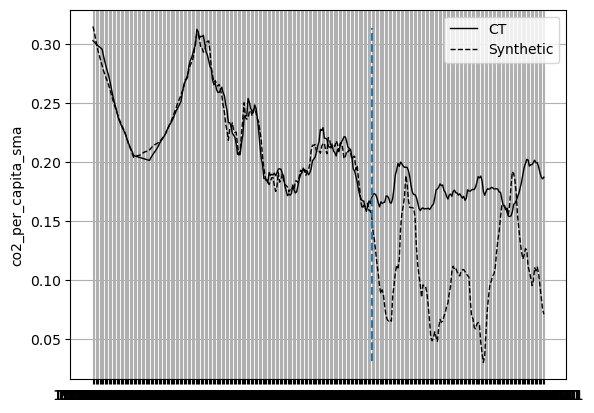

None


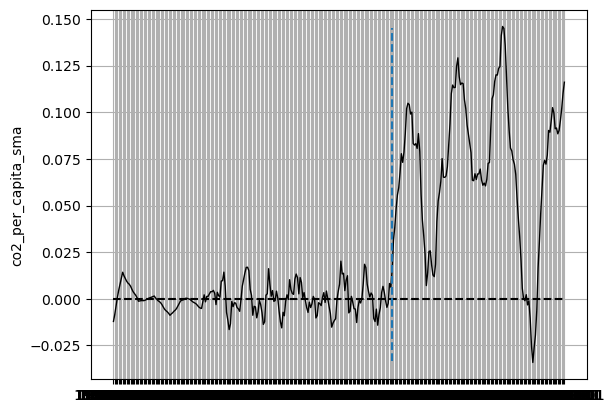

None
State: DE
0.00033364353634375034
WI   -0.082
AZ    0.469
IL   -0.455
IN   -0.048
SD    0.265
MT   -0.045
PA    1.433
MN   -0.113
MS    0.047
OR   -0.138
VA    0.769
KY   -0.098
WA   -0.783
SC   -0.192
NC   -0.601
NE   -0.107
WV    0.204
NM    0.025
TN    0.039
NV    0.141
ID   -0.214
UT   -0.885
CO    1.481
ND    0.079
GA   -0.326
AR   -0.366
LA    0.056
IA    0.538
MI    0.535
OH    0.413
TX    0.404
MO   -0.668
AL   -0.354
KS   -0.057
WY   -0.048
OK   -0.426
FL    0.108
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.749      0.749        1.279
special.1.avg_facility_age_sma      55.871     55.882       60.473
special.2.snow_sma                   0.878      0.878        1.679
special.3.tavg_sma                  56.782     56.797       56.063
special.4.monthly_pop_density_sma    0.003      0.003        0.033
special.5.eprod_per_capita_sma       0.000      0.001        0.060


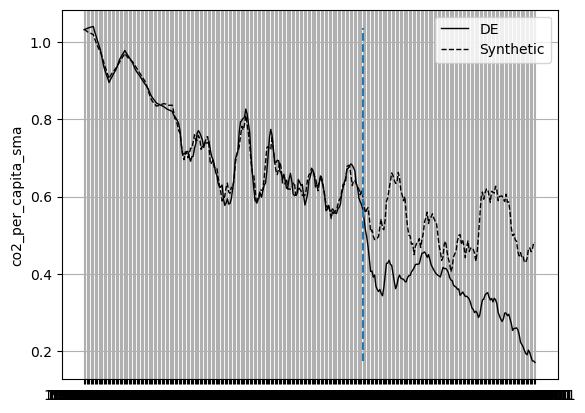

None


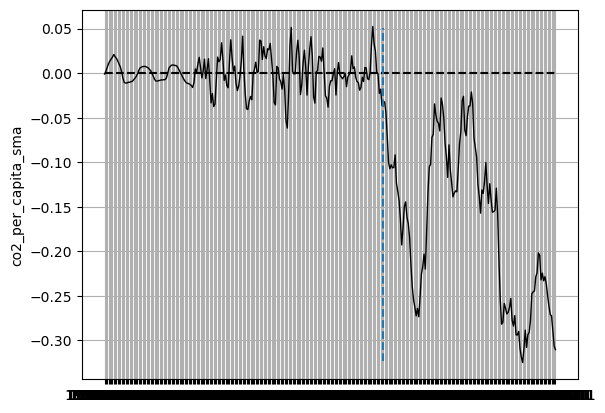

None
State: ME
0.0001442297131410878
WI   -0.328
AZ    0.209
IL   -0.161
IN   -0.217
SD   -0.083
MT    0.037
PA   -0.646
MN    0.739
MS   -0.035
OR    0.068
VA    1.056
KY   -0.120
WA    0.103
SC    0.174
NC   -0.154
NE   -0.158
WV   -0.025
NM    0.101
TN    0.156
NV   -0.062
ID   -0.067
UT   -0.583
CO    0.969
ND    0.142
GA   -0.021
AR   -0.081
LA   -0.230
IA    0.429
MI   -0.411
OH   -0.216
TX    0.748
MO    0.531
AL   -0.292
KS   -0.085
WY   -0.016
OK   -0.070
FL   -0.399
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.196      0.196        1.279
special.1.avg_facility_age_sma      37.637     37.651       60.473
special.2.snow_sma                   5.500      5.499        1.679
special.3.tavg_sma                  46.492     46.502       56.063
special.4.monthly_pop_density_sma    0.028      0.028        0.033
special.5.eprod_per_capita_sma       0.010      0.009        0.060


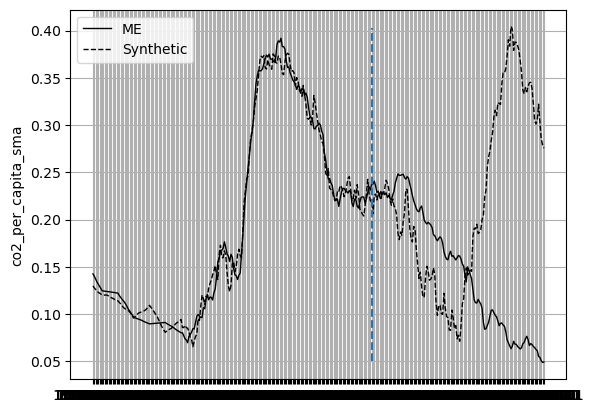

None


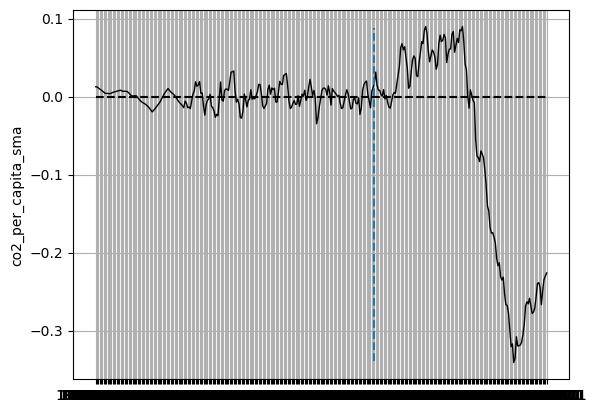

None
State: MD
4.1441876454819594e-05
WI    0.248
AZ   -0.039
IL    0.020
IN   -0.178
SD    0.133
MT    0.035
PA    0.074
MN   -0.015
MS   -0.243
OR    0.001
VA    0.123
KY    0.099
WA    0.112
SC   -0.030
NC    0.244
NE   -0.090
WV   -0.049
NM    0.001
TN   -0.021
NV   -0.122
ID   -0.206
UT   -0.000
CO   -0.162
ND    0.023
GA    0.147
AR   -0.168
LA    0.076
IA   -0.083
MI    0.396
OH    0.008
TX    0.141
MO    0.155
AL   -0.143
KS    0.255
WY    0.004
OK   -0.234
FL    0.489
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.496      0.496        1.279
special.1.avg_facility_age_sma      71.269     71.252       60.473
special.2.snow_sma                   1.570      1.571        1.679
special.3.tavg_sma                  55.783     55.789       56.063
special.4.monthly_pop_density_sma    0.002      0.002        0.033
special.5.eprod_per_capita_sma       0.004      0.003        0.060


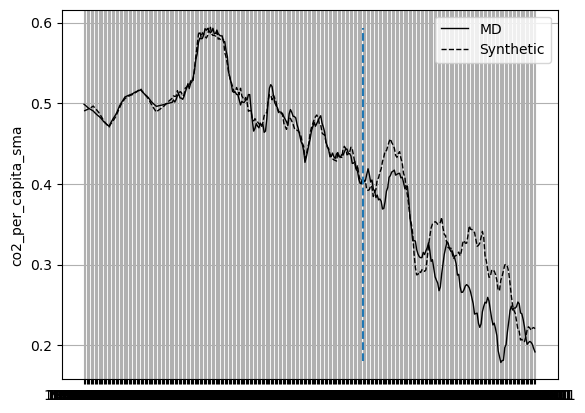

None


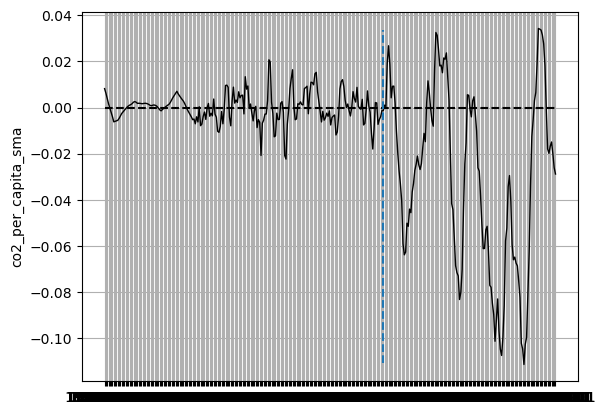

None
State: MA
4.56024781370043e-05
WI    0.344
AZ    0.098
IL    0.296
IN   -0.191
SD   -0.039
MT    0.089
PA    0.407
MN    0.210
MS   -0.051
OR   -0.003
VA    0.280
KY    0.036
WA    0.054
SC   -0.076
NC   -0.291
NE   -0.229
WV   -0.010
NM    0.052
TN   -0.059
NV   -0.024
ID   -0.030
UT   -0.126
CO    0.222
ND    0.008
GA    0.036
AR   -0.067
LA   -0.097
IA   -0.072
MI   -0.221
OH    0.264
TX    0.381
MO    0.133
AL   -0.011
KS   -0.134
WY   -0.013
OK   -0.301
FL    0.138
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.324      0.324        1.279
special.1.avg_facility_age_sma      52.219     52.221       60.473
special.2.snow_sma                   4.020      4.020        1.679
special.3.tavg_sma                  51.800     51.803       56.063
special.4.monthly_pop_density_sma    0.002      0.002        0.033
special.5.eprod_per_capita_sma       0.001      0.001        0.060


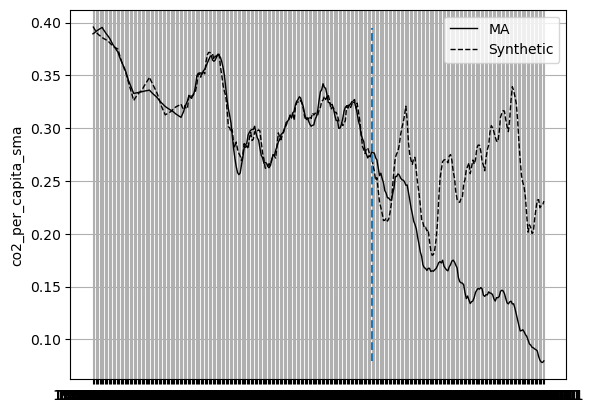

None


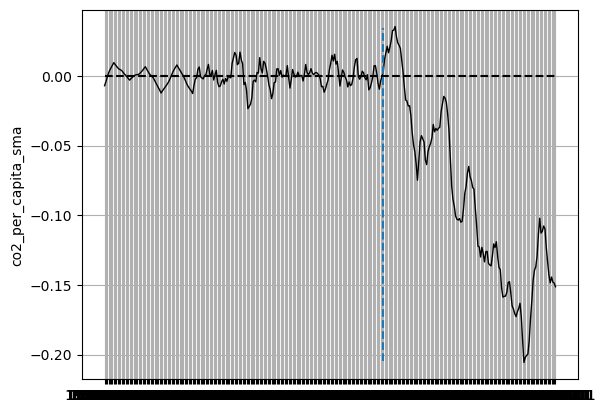

None
State: NH
0.00015371993660865757
WI    1.242
AZ   -0.047
IL    0.018
IN   -0.827
SD    0.315
MT    0.156
PA    1.077
MN    1.749
MS    0.237
OR   -0.518
VA    0.378
KY    0.324
WA    0.600
SC    0.428
NC   -0.246
NE    0.097
WV    0.060
NM   -0.072
TN   -0.797
NV    0.160
ID   -0.952
UT    0.477
CO   -0.063
ND   -0.144
GA   -0.001
AR   -0.421
LA    0.067
IA    0.104
MI   -1.335
OH   -0.191
TX    0.368
MO    0.074
AL    0.216
KS   -0.396
WY   -0.034
OK   -0.369
FL   -0.734
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.414      0.414        1.279
special.1.avg_facility_age_sma      61.725     61.728       60.473
special.2.snow_sma                  22.766     22.759        1.679
special.3.tavg_sma                  27.794     27.779       56.063
special.4.monthly_pop_density_sma    0.008      0.008        0.033
special.5.eprod_per_capita_sma       0.008      0.008        0.060


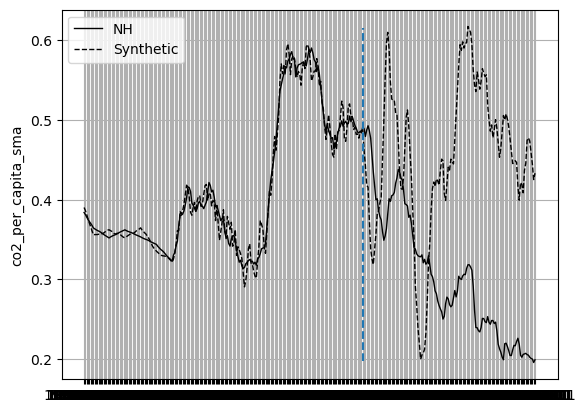

None


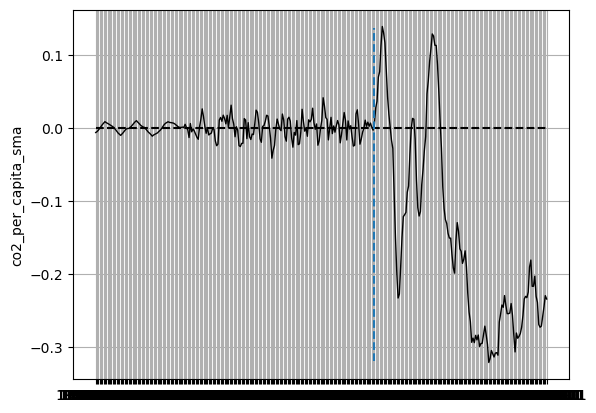

None
State: NJ
1.5683904665177936e-05
WI   -0.124
AZ   -0.006
IL   -0.009
IN   -0.132
SD    0.064
MT    0.031
PA    0.097
MN    0.113
MS   -0.160
OR   -0.062
VA    0.166
KY    0.032
WA    0.356
SC    0.131
NC    0.200
NE   -0.024
WV   -0.013
NM   -0.013
TN    0.124
NV   -0.065
ID   -0.082
UT   -0.031
CO   -0.083
ND   -0.059
GA   -0.019
AR   -0.076
LA    0.083
IA   -0.048
MI    0.501
OH   -0.247
TX    0.163
MO    0.304
AL   -0.034
KS   -0.015
WY   -0.005
OK    0.007
FL   -0.064
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.135      0.135        1.279
special.1.avg_facility_age_sma      51.819     51.817       60.473
special.2.snow_sma                   1.105      1.105        1.679
special.3.tavg_sma                  54.177     54.177       56.063
special.4.monthly_pop_density_sma    0.001      0.001        0.033
special.5.eprod_per_capita_sma       0.003      0.003        0.060


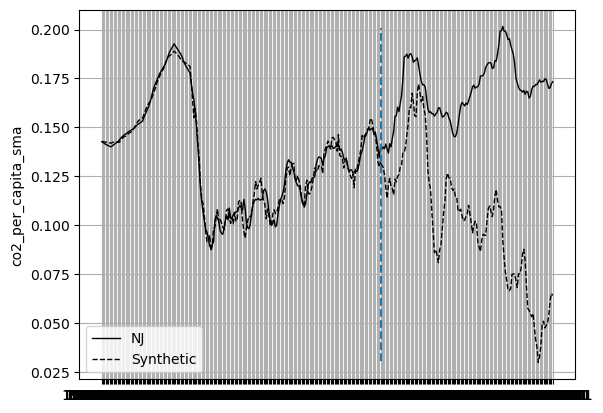

None


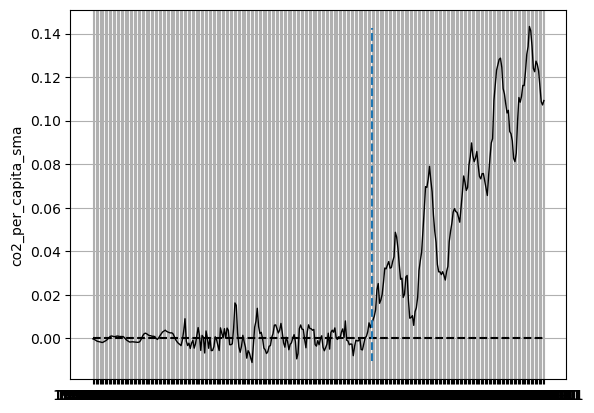

None
State: NY
3.359640018734894e-05
WI    0.113
AZ    0.025
IL   -0.088
IN   -0.104
SD    0.061
MT    0.020
PA   -0.015
MN    0.224
MS   -0.149
OR    0.053
VA    0.247
KY   -0.093
WA    0.167
SC   -0.037
NC   -0.099
NE   -0.194
WV   -0.054
NM   -0.017
TN    0.051
NV   -0.061
ID   -0.099
UT   -0.351
CO    0.270
ND    0.049
GA    0.341
AR    0.038
LA    0.002
IA    0.036
MI    0.156
OH    0.008
TX    0.599
MO    0.162
AL    0.001
KS   -0.072
WY    0.007
OK   -0.240
FL    0.044
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.241      0.241        1.279
special.1.avg_facility_age_sma      50.664     50.665       60.473
special.2.snow_sma                   1.995      1.996        1.679
special.3.tavg_sma                  54.431     54.438       56.063
special.4.monthly_pop_density_sma    0.003      0.003        0.033
special.5.eprod_per_capita_sma       0.003      0.002        0.060


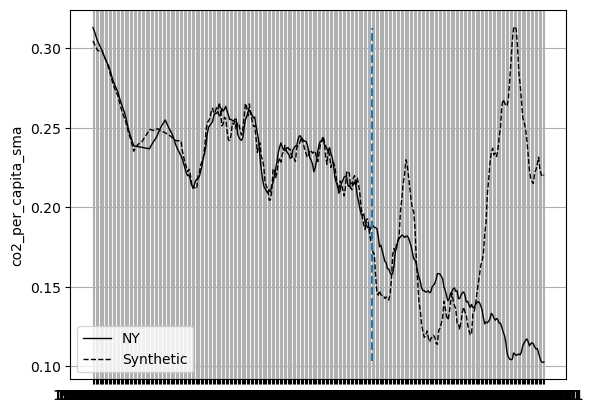

None


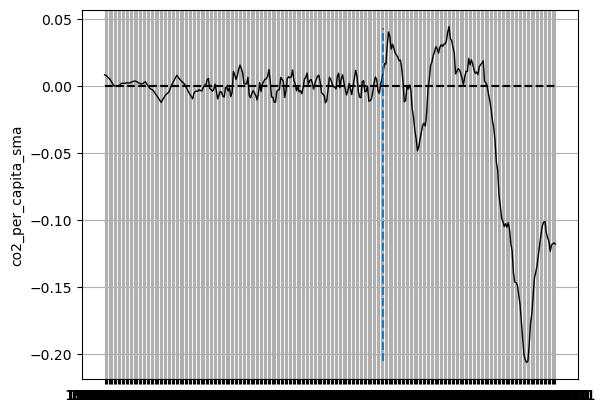

None
State: RI
0.00010173776664771632
WI   -0.247
AZ   -0.003
IL   -0.154
IN   -0.011
SD   -0.213
MT   -0.021
PA    0.084
MN    0.074
MS    0.053
OR   -0.150
VA    0.073
KY    0.347
WA    0.735
SC    0.285
NC    0.376
NE   -0.004
WV    0.031
NM    0.114
TN   -0.296
NV    0.070
ID    0.422
UT    0.192
CO   -0.181
ND   -0.166
GA   -0.387
AR   -0.028
LA   -0.279
IA    0.149
MI   -0.167
OH    0.384
TX   -0.206
MO    0.283
AL   -0.073
KS   -0.163
WY   -0.027
OK    0.367
FL   -0.267
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.164      0.164        1.279
special.1.avg_facility_age_sma      45.233     45.239       60.473
special.2.snow_sma                   2.589      2.586        1.679
special.3.tavg_sma                  51.826     51.811       56.063
special.4.monthly_pop_density_sma    0.001      0.001        0.033
special.5.eprod_per_capita_sma       0.000      0.001        0.060


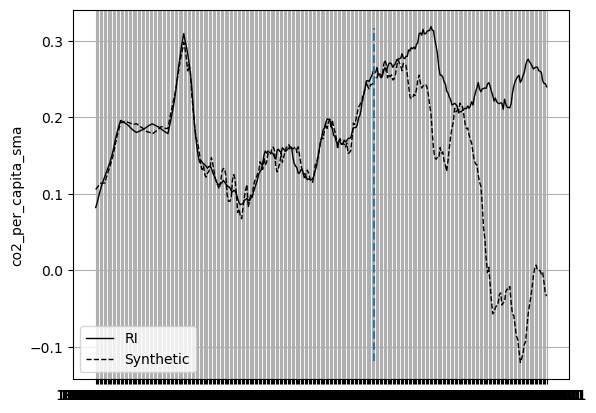

None


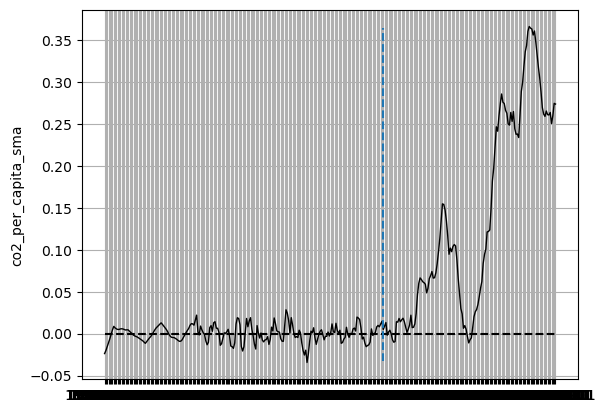

None
State: VT
2.4916948838094215e-05
WI    0.641
AZ   -0.034
IL   -0.133
IN   -0.327
SD    0.118
MT   -0.002
PA   -0.037
MN    0.593
MS   -0.248
OR   -0.110
VA   -0.142
KY    0.128
WA   -0.001
SC    0.270
NC    0.199
NE   -0.211
WV   -0.090
NM    0.004
TN   -0.178
NV   -0.131
ID    0.153
UT    0.118
CO    0.020
ND   -0.101
GA   -0.008
AR   -0.173
LA    0.139
IA    0.200
MI   -0.149
OH    0.049
TX    0.038
MO    0.212
AL   -0.007
KS    0.086
WY    0.018
OK   -0.119
FL    0.216
Name: weights, dtype: float64
                                   treated  synthetic  sample mean
co2_per_capita_sma                   0.033      0.033        1.279
special.1.avg_facility_age_sma      72.500     72.492       60.473
special.2.snow_sma                   7.275      7.274        1.679
special.3.tavg_sma                  46.056     46.051       56.063
special.4.monthly_pop_density_sma    0.016      0.016        0.033
special.5.eprod_per_capita_sma       0.008      0.007        0.060


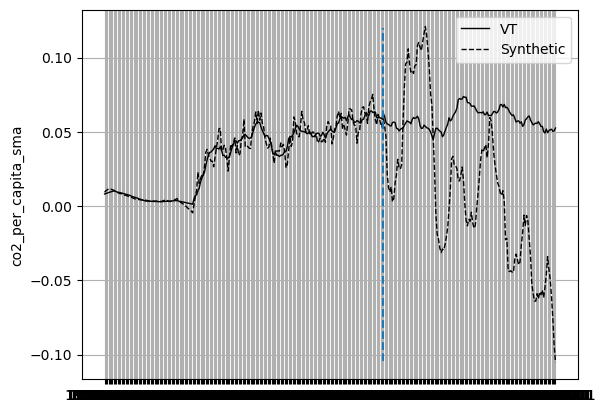

None


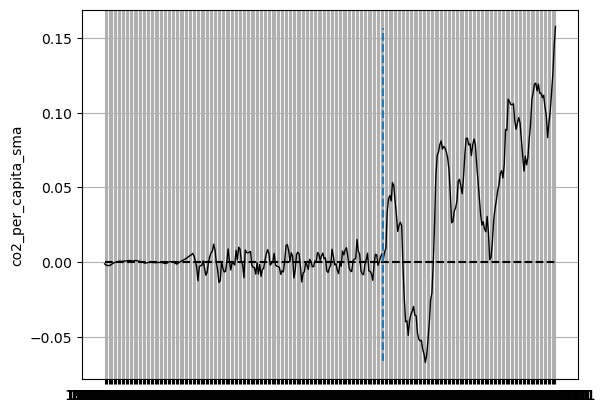

None


In [14]:
aug_synth_models = {}
for state in rggi_states:
    dataprep = Dataprep(
    foo=df_mo,
    predictors=['co2_per_capita_sma'],
    predictors_op="mean",
    time_predictors_prior=preintervention_ma_range,
    special_predictors=[
        ('avg_facility_age_sma',date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'median'),
        ('snow_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==1)]), 'mean'),
        ('tavg_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==7)]),'mean'),   
        ('monthly_pop_density_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year>=1991) & (preintervention_ma_range_dt.dt.year<=2008)]), "mean"),        
        ('eprod_per_capita_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),        
        #('gdp_per_capita_sma',  date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year>=2007)& (preintervention_ma_range_dt.dt.year<=2008)]), 'std'),
        #('monthly_fossil_pct_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=1991)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),
        #('republican_vote_pct', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=2004)&(preintervention_ma_range_dt.dt.year <=2008)&(preintervention_ma_range_dt.dt.month ==12)]), 'mean'), 
        #('euse_per_capita_sma', date_to_str(preintervention_ma_range_dt[(preintervention_ma_range_dt.dt.year >=2007)&(preintervention_ma_range_dt.dt.year <=2008)]), 'mean'),
        ],
    dependent="co2_per_capita_sma",
    unit_variable="state",
    time_variable="date",
    treatment_identifier=state,
    controls_identifier=control_states,
    time_optimize_ssr=preintervention_ma_range
    )
    augsynth = AugSynth()
    augsynth.fit(dataprep=dataprep)
    aug_synth_models[state] = augsynth
    print(f"State: {state}")
    print(augsynth.mspe())
    print(augsynth.weights())
    print(augsynth.summary())
    print(augsynth.path_plot(time_period=years_sma, treatment_time=treatment_dates_ma[0]))
    print(augsynth.gaps_plot(time_period=years_sma, treatment_time=treatment_dates_ma[0]))

Following Ferman et al (2020), we now compute a normalized R-squared of the model in the pre-treatment period for each RGGI state. 

In [24]:
out = df_mo.loc[(df_mo['state'] == 'DE') & (pd.to_datetime(df_mo['date']) < '2009-01-01')]['co2_per_capita_sma']

In [29]:
def get_preds(target_date, df, weights):
    pred=0
    for state,weight in weights.items():
        rows = df.loc[(df['state']==state) & (df['date']==target_date)]
        if not rows.empty:
            value = rows['co2_per_capita_sma'].iloc[0]
            pred += value * weight
    return pred

predictions = []
for date in years:
    pred = get_preds(target_date=date, df=df_mo, weights=synth_mo_ma.weights())
    predictions.append([date, pred])

preds_df = pd.DataFrame(predictions,columns=['date','predicted_value'])
    

In [30]:
preds_df = preds_df.dropna()
preds_df = preds_df.loc[preds_df['date'] < '2009-01-01']

In [31]:
DE_actual = df_mo.loc[(df_mo['state']=='DE') & (df_mo['date'] >= '1991-05-01') & (df_mo['date'] < treatment_date)][['date','co2_per_capita_sma']]

In [32]:
DE_avg = np.sum(DE_actual[['co2_per_capita_sma']]) / len(DE_actual)
num = np.sum((DE_actual[['co2_per_capita_sma']].values - preds_df[['predicted_value']].values)**2)
denom = np.sum((DE_actual[['co2_per_capita_sma']] - DE_avg)**2)

R_squared = 1 - (num / denom)

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [33]:
R_squared

co2_per_capita_sma    0.97978
dtype: float64

We see that the normalized R-squared for the Delaware model is 0.98, which indicates very good pre-treatment fit. We now write a function to apply this to each of the RGGI states:

In [ ]:
def normalized_r_squared(actual, preds):
    avg = actual[['co2_per_capita_sma']].mean()
    num = ((actual['co2_per_capita_sma'] - merged['predicted_value'])**2).sum()
    denom_ = ((merged['co2_per_capita_sma'] - avg)**2).sum()
    norm_r_squared = 1 - (num / denom)
    return norm_r_squared
    

In [76]:
aug_synth_models['CT'].weights()

WI    0.153
AZ   -0.023
IL    0.172
IN    0.186
SD   -0.042
MT   -0.007
PA    0.034
MN    0.233
MS    0.037
OR   -0.148
VA    0.160
KY   -0.003
WA    0.063
SC    0.025
NC   -0.311
NE   -0.308
WV   -0.046
NM    0.072
TN   -0.024
NV    0.023
ID    0.337
UT   -0.301
CO    0.430
ND   -0.062
GA    0.146
AR    0.036
LA   -0.199
IA    0.018
MI   -0.306
OH    0.460
TX    0.473
MO    0.131
AL    0.010
KS   -0.196
WY    0.008
OK   -0.231
FL   -0.001
Name: weights, dtype: float64

In [ ]:
r_squareds = {}
for state in rggi_states:
    # Create predictions list
    predictions = []
    weights = aug_synth_models[state].weights()
    for date in years:
        pred = get_preds(target_date=date, df=df_mo, weights=weights)
        predictions.append([date, pred])
    
    # Create predictions DataFrame
    preds_df = pd.DataFrame(predictions, columns=['date', 'predicted_value'])
    preds_df = preds_df.dropna()
    preds_df = preds_df.loc[preds_df['date'] < treatment_date]
    
    # Get actual data for this state
    actual = df_mo.loc[
        (df_mo['state'] == state) & 
        (df_mo['date'] >= '1991-05-01') & 
        (df_mo['date'] < treatment_date),
        ['date', 'co2_per_capita_sma']
    ]
    
    actual_values = actual['co2_per_capita_sma'].values
    pred_values = preds_df['predicted_value'].values
      
    print(f"State: {state}")
    print(f"Data points: {len(actual_values)}")
    
    # Modified normalized_r_squared function for arrays
    avg = np.mean(actual_values)
    num = np.sum((actual_values - predictions)**2)
    denom = np.sum((actual_values - avg)**2)
    
    # Calculate and store r-squared
    norm_r_squared = 1 - (num / denom)
    r_squareds[state] = norm_r_squared

State: CT
Data points: 212


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U32')) -> None

In [73]:
r_squareds

{'CT': -200.88379348423476,
 'DE': 0.9797796953094193,
 'ME': -32.73864731871216,
 'MD': -45.95402691333933,
 'MA': -175.8791676955175,
 'NH': -20.359130353916257,
 'NJ': -564.7378954109342,
 'NY': -465.8381407052422,
 'RI': -160.0280315125921,
 'VT': -1144.6532354900542}